In [2]:
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [3]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras import backend as k

In [4]:
iv3 = InceptionV3()

In [5]:
#print iv3.summary()
from keras.preprocessing import image

# cargando imagen
x = image.img_to_array(image.load_img("./labrador.jpg", target_size=(299,299)))

x /= 255
x -= 0.5
x *= 2

x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])
y = iv3.predict(x)


decode_predictions(y)

[[(u'n02099712', u'Labrador_retriever', 0.9450182),
  (u'n02099601', u'golden_retriever', 0.03835289),
  (u'n02108422', u'bull_mastiff', 0.0008371825),
  (u'n02101556', u'clumber', 0.00068747887),
  (u'n02110958', u'pug', 0.00037130306)]]

# Ataques adversarios

In [11]:
inp_layer = iv3.layers[0].input
out_layer = iv3.layers[-1].output

target_class = 951

# función de coste. Quiero que minimice el error en dirección a target_class
loss = out_layer[0, target_class]

# gradiente entre loss y los pixéles de entrada. Devuelve un tensor cuyos valores nos indican como debemos variar
# los pixeles para que poco a poco se optimise la función de coste.
grad = k.gradients(loss, inp_layer)[0]

# aplicando el gradiente

optimaze_gradient = k.function([inp_layer, k.learning_phase()],[grad, loss])

adv = np.copy(x)

# certeza con la que creera que es determinada clase
cost = 0.0

# máximo rango de perturbación a los pixeles
pert = 0.01

max_pert = x + pert
min_pert = x - pert



while cost<0.95:
    
    # gradiente optimizado. Obtiene los pixeles modificados
    gr, cost = optimaze_gradient([adv, 0])
    
    # le sumamos el gradiente a la imagen para modificarla
    adv += gr
    
    # limitando la perturbación de los pixeles, para que no tengan valores 
    # mayores a max_pert ni menores a min_pert
    adv = np.clip(adv, min_pert, max_pert)
    adv = np.clip(adv, -1, 1)
    
    print "Target cost: ", cost

hacked = np.copy(adv)

Target cost:  1.5318421e-05
Target cost:  1.5367292e-05
Target cost:  1.5416557e-05
Target cost:  1.5466272e-05
Target cost:  1.5516485e-05
Target cost:  1.556689e-05
Target cost:  1.5617898e-05
Target cost:  1.5668762e-05
Target cost:  1.5719508e-05
Target cost:  1.5770787e-05
Target cost:  1.582203e-05
Target cost:  1.5873487e-05
Target cost:  1.5925185e-05
Target cost:  1.5977275e-05
Target cost:  1.6030277e-05
Target cost:  1.608328e-05
Target cost:  1.6136475e-05
Target cost:  1.6190426e-05
Target cost:  1.6245393e-05
Target cost:  1.630071e-05
Target cost:  1.6356524e-05
Target cost:  1.6412781e-05
Target cost:  1.6469647e-05
Target cost:  1.6526896e-05
Target cost:  1.6583917e-05
Target cost:  1.6640965e-05
Target cost:  1.669834e-05
Target cost:  1.6756632e-05
Target cost:  1.6814705e-05
Target cost:  1.6872887e-05
Target cost:  1.6931495e-05
Target cost:  1.6990598e-05
Target cost:  1.7050335e-05
Target cost:  1.7111068e-05
Target cost:  1.7172073e-05
Target cost:  1.7233115e-

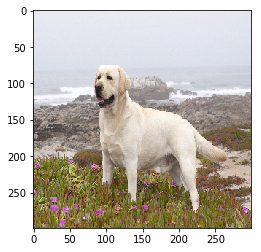

In [13]:
adv /= 2
adv += 0.5
adv *= 255

plt.imshow(adv[0].astype(np.uint8))
plt.show()

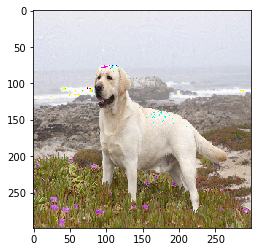

In [15]:
from PIL import Image
im = Image.fromarray(adv[0].astype(np.uint8))
im.save("./hacked.png")